In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os
import tqdm

In [2]:
# The train files are .parquet files, so we need to install pyarrow to read them
import pyarrow.parquet as pq

# They are several files, so we need to read them all
import glob
train_files = glob.glob('train_*.parquet')
train_files

# Read the first file to see the structure
df = pq.read_table(train_files[0]).to_pandas()
df.head()

,Id,customer_id,interest_rate,name,country,date_of_birth,address,date,atm_transfer_in,atm_transfer_out,...,crypto_in_volume,crypto_out_volume,complaints,touchpoints,csat_scores,tenure,from_competitor,job,churn_due_to_fraud,model_predicted_fraud
0,1,1,3.5,Yolanda Parker,Lithuania,1954-07-10,"1929 Erin Lights Suite 709\nLake Michaelburgh,...",2008-01-17,0,0,...,393.145010,220.900654,0,[],"{'appointment': None, 'email': None, 'phone': ...",0,False,Amenity horticulturist,False,False
1,6,1,3.5,Yolanda Parker,Lithuania,1954-07-10,"1929 Erin Lights Suite 709\nLake Michaelburgh,...",2008-01-18,0,0,...,390.005729,221.147296,0,[],"{'appointment': None, 'email': None, 'phone': ...",1,False,Amenity horticulturist,False,False
2,16,1,3.5,Yolanda Parker,Lithuania,1954-07-10,"1929 Erin Lights Suite 709\nLake Michaelburgh,...",2008-01-19,0,0,...,393.209108,260.510535,0,[],"{'appointment': None, 'email': None, 'phone': ...",2,False,Amenity horticulturist,False,False
3,31,1,3.5,Yolanda Parker,Lithuania,1954-07-10,"1929 Erin Lights Suite 709\nLake Michaelburgh,...",2008-01-20,0,0,...,394.078294,203.214128,0,[],"{'appointment': None, 'email': None, 'phone': ...",3,False,Amenity horticulturist,False,False
4,50,1,3.5,Yolanda Parker,Lithuania,1954-07-10,"1929 Erin Lights Suite 709\nLake Michaelburgh,...",2008-01-21,0,0,...,395.174604,207.894467,0,"[whatsapp, email, email]","{'appointment': None, 'email': None, 'phone': ...",4,False,Amenity horticulturist,False,False


In [3]:
# Read all the files and concatenate them
df = pd.concat([pq.read_table(file).to_pandas() for file in train_files])
# We want to read the features in full
pd.set_option('display.max_columns', None)
df.head()

,Id,customer_id,interest_rate,name,country,date_of_birth,address,date,atm_transfer_in,atm_transfer_out,bank_transfer_in,bank_transfer_out,crypto_in,crypto_out,bank_transfer_in_volume,bank_transfer_out_volume,crypto_in_volume,crypto_out_volume,complaints,touchpoints,csat_scores,tenure,from_competitor,job,churn_due_to_fraud,model_predicted_fraud
0,1,1,3.5,Yolanda Parker,Lithuania,1954-07-10,"1929 Erin Lights Suite 709\nLake Michaelburgh,...",2008-01-17,0,0,17476,3911,56,13,7380.083338,5844.193394,393.145010,220.900654,0,[],"{'appointment': None, 'email': None, 'phone': ...",0,False,Amenity horticulturist,False,False
1,6,1,3.5,Yolanda Parker,Lithuania,1954-07-10,"1929 Erin Lights Suite 709\nLake Michaelburgh,...",2008-01-18,0,0,19680,3358,46,14,7504.751064,4986.370246,390.005729,221.147296,0,[],"{'appointment': None, 'email': None, 'phone': ...",1,False,Amenity horticulturist,False,False
2,16,1,3.5,Yolanda Parker,Lithuania,1954-07-10,"1929 Erin Lights Suite 709\nLake Michaelburgh,...",2008-01-19,0,0,17958,4113,48,13,6720.934090,7451.373471,393.209108,260.510535,0,[],"{'appointment': None, 'email': None, 'phone': ...",2,False,Amenity horticulturist,False,False
3,31,1,3.5,Yolanda Parker,Lithuania,1954-07-10,"1929 Erin Lights Suite 709\nLake Michaelburgh,...",2008-01-20,0,0,22772,3750,49,15,6976.218992,6548.352211,394.078294,203.214128,0,[],"{'appointment': None, 'email': None, 'phone': ...",3,False,Amenity horticulturist,False,False
4,50,1,3.5,Yolanda Parker,Lithuania,1954-07-10,"1929 Erin Lights Suite 709\nLake Michaelburgh,...",2008-01-21,0,0,23610,4005,60,12,6453.651629,6129.342716,395.174604,207.894467,0,"[whatsapp, email, email]","{'appointment': None, 'email': None, 'phone': ...",4,False,Amenity horticulturist,False,False


In [4]:
# Check the shape of the data
print(f"Our dataset has {df.shape[0]} rows and {df.shape[1]} columns")

Our dataset has 3926058 rows and 26 columns


In [5]:
# Check the data types
df.dtypes

Id                                   int64
customer_id                          int64
interest_rate                      float64
name                                object
country                             object
date_of_birth                       object
address                             object
date                        datetime64[ns]
atm_transfer_in                      int64
atm_transfer_out                     int64
bank_transfer_in                     int64
bank_transfer_out                    int64
crypto_in                            int64
crypto_out                           int64
bank_transfer_in_volume            float64
bank_transfer_out_volume           float64
crypto_in_volume                   float64
crypto_out_volume                  float64
complaints                           int64
touchpoints                         object
csat_scores                         object
tenure                               int64
from_competitor                       bool
job        

In [6]:
# Check the missing values
missing = df.isnull().sum() # Number of missing values
missing = missing[missing > 0] # Keep only those with missing values
missing

Series([], dtype: int64)

In [7]:
# Check the unique values
# Skip columns that contain arrays or dictionaries by checking their dtype
unique = df.select_dtypes(exclude=['object']).nunique() # Number of unique values for non-object columns
unique = unique[unique == 1] # Keep only those with one unique value
print("Columns with only one unique value:")
print(unique)

Columns with only one unique value:
Series([], dtype: int64)


In [8]:
# Drop the columns with only one unique value
df.drop(unique.index, axis=1, inplace=True)

# Check the unique values again
unique = df.select_dtypes(exclude=['object']).nunique()
print("Columns with only one unique value:")

Columns with only one unique value:


In [9]:
df.head()

,Id,customer_id,interest_rate,name,country,date_of_birth,address,date,atm_transfer_in,atm_transfer_out,bank_transfer_in,bank_transfer_out,crypto_in,crypto_out,bank_transfer_in_volume,bank_transfer_out_volume,crypto_in_volume,crypto_out_volume,complaints,touchpoints,csat_scores,tenure,from_competitor,job,churn_due_to_fraud,model_predicted_fraud
0,1,1,3.5,Yolanda Parker,Lithuania,1954-07-10,"1929 Erin Lights Suite 709\nLake Michaelburgh,...",2008-01-17,0,0,17476,3911,56,13,7380.083338,5844.193394,393.145010,220.900654,0,[],"{'appointment': None, 'email': None, 'phone': ...",0,False,Amenity horticulturist,False,False
1,6,1,3.5,Yolanda Parker,Lithuania,1954-07-10,"1929 Erin Lights Suite 709\nLake Michaelburgh,...",2008-01-18,0,0,19680,3358,46,14,7504.751064,4986.370246,390.005729,221.147296,0,[],"{'appointment': None, 'email': None, 'phone': ...",1,False,Amenity horticulturist,False,False
2,16,1,3.5,Yolanda Parker,Lithuania,1954-07-10,"1929 Erin Lights Suite 709\nLake Michaelburgh,...",2008-01-19,0,0,17958,4113,48,13,6720.934090,7451.373471,393.209108,260.510535,0,[],"{'appointment': None, 'email': None, 'phone': ...",2,False,Amenity horticulturist,False,False
3,31,1,3.5,Yolanda Parker,Lithuania,1954-07-10,"1929 Erin Lights Suite 709\nLake Michaelburgh,...",2008-01-20,0,0,22772,3750,49,15,6976.218992,6548.352211,394.078294,203.214128,0,[],"{'appointment': None, 'email': None, 'phone': ...",3,False,Amenity horticulturist,False,False
4,50,1,3.5,Yolanda Parker,Lithuania,1954-07-10,"1929 Erin Lights Suite 709\nLake Michaelburgh,...",2008-01-21,0,0,23610,4005,60,12,6453.651629,6129.342716,395.174604,207.894467,0,"[whatsapp, email, email]","{'appointment': None, 'email': None, 'phone': ...",4,False,Amenity horticulturist,False,False


In [10]:
# There are some features whose values are in square brackets, which means they are arrays
# Let's check the unique values of these features
array_features = df.select_dtypes(include=['object']).columns
for feature in array_features:
    print(f"Feature: {feature}")
    # Convert the values to strings before getting unique values
    unique_values = df[feature].astype(str).unique()
    print(unique_values[:5])  # Show only first 5 unique values to keep output manageable
    print(f"Total unique values: {len(unique_values)}")
    print()

Feature: name
['Yolanda Parker' 'Bonnie Carr' 'Michael Mcknight' 'Sharon Howard'
 'Emily Solis']
Total unique values: 74770

Feature: country
['Lithuania' 'Greece' 'Romania' 'Switzerland' 'Netherlands']
Total unique values: 25

Feature: date_of_birth
['1954-07-10' '1947-05-27' '2002-11-09' '1973-09-16' '2006-06-30']
Total unique values: 24507

Feature: address
['1929 Erin Lights Suite 709\nLake Michaelburgh, GU 16541 Lithuania'
 '00867 Dominguez Camp Apt. 575\nPort Josephland, TX 64807 Greece'
 '36495 Travis Ranch Apt. 055\nJustinmouth, CO 75114 Romania'
 '4660 Wilson Streets Apt. 764\nSouth Amyside, PW 71642 Switzerland'
 '664 Brown Rapid\nBrianburgh, MN 10337 Netherlands']
Total unique values: 106179

Feature: touchpoints
['[]' "['whatsapp' 'email' 'email']" "['email']"
 "['whatsapp' 'email' 'appointment']" "['whatsapp' 'email']"]
Total unique values: 84

Feature: csat_scores
["{'appointment': None, 'email': None, 'phone': None, 'whatsapp': None}"
 "{'appointment': None, 'email': 7.0

In [11]:
# None of the features have less than 10 unique values, so we can keep them as they are
# We will check for missing values in these features particularly the ones with square brackets and curly braces
missing = df[array_features].isnull().sum()
missing = missing[missing > 0]
missing

Series([], dtype: int64)

In [12]:
df.head()

,Id,customer_id,interest_rate,name,country,date_of_birth,address,date,atm_transfer_in,atm_transfer_out,bank_transfer_in,bank_transfer_out,crypto_in,crypto_out,bank_transfer_in_volume,bank_transfer_out_volume,crypto_in_volume,crypto_out_volume,complaints,touchpoints,csat_scores,tenure,from_competitor,job,churn_due_to_fraud,model_predicted_fraud
0,1,1,3.5,Yolanda Parker,Lithuania,1954-07-10,"1929 Erin Lights Suite 709\nLake Michaelburgh,...",2008-01-17,0,0,17476,3911,56,13,7380.083338,5844.193394,393.145010,220.900654,0,[],"{'appointment': None, 'email': None, 'phone': ...",0,False,Amenity horticulturist,False,False
1,6,1,3.5,Yolanda Parker,Lithuania,1954-07-10,"1929 Erin Lights Suite 709\nLake Michaelburgh,...",2008-01-18,0,0,19680,3358,46,14,7504.751064,4986.370246,390.005729,221.147296,0,[],"{'appointment': None, 'email': None, 'phone': ...",1,False,Amenity horticulturist,False,False
2,16,1,3.5,Yolanda Parker,Lithuania,1954-07-10,"1929 Erin Lights Suite 709\nLake Michaelburgh,...",2008-01-19,0,0,17958,4113,48,13,6720.934090,7451.373471,393.209108,260.510535,0,[],"{'appointment': None, 'email': None, 'phone': ...",2,False,Amenity horticulturist,False,False
3,31,1,3.5,Yolanda Parker,Lithuania,1954-07-10,"1929 Erin Lights Suite 709\nLake Michaelburgh,...",2008-01-20,0,0,22772,3750,49,15,6976.218992,6548.352211,394.078294,203.214128,0,[],"{'appointment': None, 'email': None, 'phone': ...",3,False,Amenity horticulturist,False,False
4,50,1,3.5,Yolanda Parker,Lithuania,1954-07-10,"1929 Erin Lights Suite 709\nLake Michaelburgh,...",2008-01-21,0,0,23610,4005,60,12,6453.651629,6129.342716,395.174604,207.894467,0,"[whatsapp, email, email]","{'appointment': None, 'email': None, 'phone': ...",4,False,Amenity horticulturist,False,False


In [13]:
def process_touchpoints(touchpoints):
    # Convert string representation of list to actual list
    touch_list = eval(str(touchpoints))
    
    # Get counts
    total = len(touch_list)
    
    # Check channels
    has_whatsapp = 'whatsapp' in touch_list
    has_email = 'email' in touch_list  
    has_phone = 'phone' in touch_list
    has_appointment = 'appointment' in touch_list
    
    return pd.Series({
        'n_touchpoints': total,
        'has_whatsapp': has_whatsapp,
        'has_email': has_email, 
        'has_phone': has_phone,
        'has_appointment': has_appointment
    })

# Apply transformation
touchpoint_features = df['touchpoints'].apply(process_touchpoints)

# Join new features to dataframe
df = pd.concat([df, touchpoint_features], axis=1)

# Drop original column
df = df.drop('touchpoints', axis=1)

# Verify changes
print("\nNew touchpoint features head:")
print(df[['n_touchpoints', 'has_whatsapp', 'has_email', 
         'has_phone', 'has_appointment']].head())


New touchpoint features head:
   n_touchpoints  has_whatsapp  has_email  has_phone  has_appointment
0              0         False      False      False            False
1              0         False      False      False            False
2              0         False      False      False            False
3              0         False      False      False            False
4              1         False      False      False            False


In [14]:
df.head()

,Id,customer_id,interest_rate,name,country,date_of_birth,address,date,atm_transfer_in,atm_transfer_out,bank_transfer_in,bank_transfer_out,crypto_in,crypto_out,bank_transfer_in_volume,bank_transfer_out_volume,crypto_in_volume,crypto_out_volume,complaints,csat_scores,tenure,from_competitor,job,churn_due_to_fraud,model_predicted_fraud,n_touchpoints,has_whatsapp,has_email,has_phone,has_appointment
0,1,1,3.5,Yolanda Parker,Lithuania,1954-07-10,"1929 Erin Lights Suite 709\nLake Michaelburgh,...",2008-01-17,0,0,17476,3911,56,13,7380.083338,5844.193394,393.145010,220.900654,0,"{'appointment': None, 'email': None, 'phone': ...",0,False,Amenity horticulturist,False,False,0,False,False,False,False
1,6,1,3.5,Yolanda Parker,Lithuania,1954-07-10,"1929 Erin Lights Suite 709\nLake Michaelburgh,...",2008-01-18,0,0,19680,3358,46,14,7504.751064,4986.370246,390.005729,221.147296,0,"{'appointment': None, 'email': None, 'phone': ...",1,False,Amenity horticulturist,False,False,0,False,False,False,False
2,16,1,3.5,Yolanda Parker,Lithuania,1954-07-10,"1929 Erin Lights Suite 709\nLake Michaelburgh,...",2008-01-19,0,0,17958,4113,48,13,6720.934090,7451.373471,393.209108,260.510535,0,"{'appointment': None, 'email': None, 'phone': ...",2,False,Amenity horticulturist,False,False,0,False,False,False,False
3,31,1,3.5,Yolanda Parker,Lithuania,1954-07-10,"1929 Erin Lights Suite 709\nLake Michaelburgh,...",2008-01-20,0,0,22772,3750,49,15,6976.218992,6548.352211,394.078294,203.214128,0,"{'appointment': None, 'email': None, 'phone': ...",3,False,Amenity horticulturist,False,False,0,False,False,False,False
4,50,1,3.5,Yolanda Parker,Lithuania,1954-07-10,"1929 Erin Lights Suite 709\nLake Michaelburgh,...",2008-01-21,0,0,23610,4005,60,12,6453.651629,6129.342716,395.174604,207.894467,0,"{'appointment': None, 'email': None, 'phone': ...",4,False,Amenity horticulturist,False,False,1,False,False,False,False


In [15]:
# Process csat_scores - extract numerical values
def extract_csat_scores(csat_dict):
    csat_dict = eval(str(csat_dict))
    scores = [v for v in csat_dict.values() if v is not None]
    return np.mean(scores) if scores else 0

df['avg_csat_score'] = df['csat_scores'].apply(extract_csat_scores)

# Drop original columns with complex data structures
df = df.drop(['csat_scores'], axis=1)

# Verify the changes
print("Number of touchpoints statistics:")
print(df['n_touchpoints'].describe())
print("\nAverage CSAT score statistics:")
print(df['avg_csat_score'].describe())

Number of touchpoints statistics:
count    3.926058e+06
mean     1.001073e-01
std      3.001430e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
Name: n_touchpoints, dtype: float64

Average CSAT score statistics:
count    3.926058e+06
mean     1.209072e-01
std      9.017082e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+01
Name: avg_csat_score, dtype: float64
count    3.926058e+06
mean     1.209072e-01
std      9.017082e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+01
Name: avg_csat_score, dtype: float64


In [16]:
df.head()

,Id,customer_id,interest_rate,name,country,date_of_birth,address,date,atm_transfer_in,atm_transfer_out,bank_transfer_in,bank_transfer_out,crypto_in,crypto_out,bank_transfer_in_volume,bank_transfer_out_volume,crypto_in_volume,crypto_out_volume,complaints,tenure,from_competitor,job,churn_due_to_fraud,model_predicted_fraud,n_touchpoints,has_whatsapp,has_email,has_phone,has_appointment,avg_csat_score
0,1,1,3.5,Yolanda Parker,Lithuania,1954-07-10,"1929 Erin Lights Suite 709\nLake Michaelburgh,...",2008-01-17,0,0,17476,3911,56,13,7380.083338,5844.193394,393.145010,220.900654,0,0,False,Amenity horticulturist,False,False,0,False,False,False,False,0.0
1,6,1,3.5,Yolanda Parker,Lithuania,1954-07-10,"1929 Erin Lights Suite 709\nLake Michaelburgh,...",2008-01-18,0,0,19680,3358,46,14,7504.751064,4986.370246,390.005729,221.147296,0,1,False,Amenity horticulturist,False,False,0,False,False,False,False,0.0
2,16,1,3.5,Yolanda Parker,Lithuania,1954-07-10,"1929 Erin Lights Suite 709\nLake Michaelburgh,...",2008-01-19,0,0,17958,4113,48,13,6720.934090,7451.373471,393.209108,260.510535,0,2,False,Amenity horticulturist,False,False,0,False,False,False,False,0.0
3,31,1,3.5,Yolanda Parker,Lithuania,1954-07-10,"1929 Erin Lights Suite 709\nLake Michaelburgh,...",2008-01-20,0,0,22772,3750,49,15,6976.218992,6548.352211,394.078294,203.214128,0,3,False,Amenity horticulturist,False,False,0,False,False,False,False,0.0
4,50,1,3.5,Yolanda Parker,Lithuania,1954-07-10,"1929 Erin Lights Suite 709\nLake Michaelburgh,...",2008-01-21,0,0,23610,4005,60,12,6453.651629,6129.342716,395.174604,207.894467,0,4,False,Amenity horticulturist,False,False,1,False,False,False,False,0.0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3926058 entries, 0 to 407604
Data columns (total 30 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   Id                        int64         
 1   customer_id               int64         
 2   interest_rate             float64       
 3   name                      object        
 4   country                   object        
 5   date_of_birth             object        
 6   address                   object        
 7   date                      datetime64[ns]
 8   atm_transfer_in           int64         
 9   atm_transfer_out          int64         
 10  bank_transfer_in          int64         
 11  bank_transfer_out         int64         
 12  crypto_in                 int64         
 13  crypto_out                int64         
 14  bank_transfer_in_volume   float64       
 15  bank_transfer_out_volume  float64       
 16  crypto_in_volume          float64       
 17  crypto_out_vol

In [18]:
# Date valuecounts
print("Date value counts:", df['date'].value_counts())

Date value counts: date
2019-08-25    1593
2019-08-28    1586
2019-08-30    1584
2019-08-27    1581
2019-08-24    1574
              ... 
2008-01-21      23
2008-01-20      18
2008-01-19      15
2008-01-18      10
2008-01-17       5
Name: count, Length: 5828, dtype: int64


In [19]:
# Address value counts
print("Address value counts:", df['address'].value_counts())

Address value counts: address
9131 Gregory Mill Apt. 076\nAnafort, PW 50124 Portugal           362
2855 Ingram Island Suite 827\nEast Dianaview, ID 59408 Latvia    350
PSC 9525, Box 7825\nAPO AP 31036 Romania                         342
252 Wood Orchard\nJohnsonstad, MO 23267 Sweden                   330
Unit 2804 Box 3919\nDPO AE 07001 Portugal                        328
                                                                ... 
378 Robbins Courts Apt. 045\nShawnville, ID 95185 Romania          1
45982 Wyatt Dam\nNorth Sonyaview, RI 91511 Estonia                 1
2838 Crosby Point\nGarciachester, SC 05434 Spain                   1
6319 Melvin Haven Apt. 432\nWhiteland, MS 01008 Portugal           1
7056 Johnston Overpass\nAlexanderberg, AR 60569 Finland            1
Name: count, Length: 106179, dtype: int64


In [20]:
# Address feature preprocessing
def process_address(address):
    # Split address into components
    parts = address.split('\n')
    
    # Extract street address from first part
    street = parts[0]
    
    # Extract country from the end
    country = parts[-1].split()[-1]
    
    # Get state code and city from middle part
    location = parts[-1].split(',')
    state = location[-2].strip().split()[-1] if len(location) > 1 else None
    city = location[0].split()[-1] if len(location) > 0 else None
    
    # Determine address type
    address_type = None
    if 'Apt.' in street:
        address_type = 'Apartment'
    elif 'Suite' in street:
        address_type = 'Suite'
    elif 'Box' in street:
        address_type = 'PO Box'
    else:
        address_type = 'Street'
        
    return pd.Series({
        'address_type': address_type,
        'state_code': state,
        'city': city,
        'address_country': country,
    })

# Apply transformation
address_features = df['address'].apply(process_address)

# Add new columns to dataframe
df = pd.concat([df, address_features], axis=1)

# Drop original address column
df = df.drop('address', axis=1)

# Verify changes
print("\nNew address features sample:")
print(df[['address_type', 'state_code', 'city', 'address_country']].head())

# Check value counts of new features
print("\nAddress types:")
print(df['address_type'].value_counts())
print("\nTop countries:")
print(df['address_country'].value_counts().head())


New address features sample:
  address_type    state_code          city address_country
0        Suite  Michaelburgh  Michaelburgh       Lithuania
1        Suite  Michaelburgh  Michaelburgh       Lithuania
2        Suite  Michaelburgh  Michaelburgh       Lithuania
3        Suite  Michaelburgh  Michaelburgh       Lithuania
4        Suite  Michaelburgh  Michaelburgh       Lithuania

Address types:
address_type
Street       1884331
Apartment     881993
Suite         880810
PO Box        278924
Name: count, dtype: int64

Top countries:
address_country
Switzerland    165704
Latvia         165608
Denmark        161382
Republic       160739
Sweden         160704
Name: count, dtype: int64


In [21]:
# Job feature preprocessing
def process_job(job):
    if ',' in job:
        primary, specialization = job.split(',', 1)
        return pd.Series({
            'primary_job': primary.strip(),
            'job_specialization': specialization.strip()
        })
    else:
        return pd.Series({
            'primary_job': job.strip(),
            'job_specialization': None
        })

# Apply transformation
job_features = df['job'].apply(process_job)

# Add new columns to dataframe
df = pd.concat([df, job_features], axis=1)

# Drop original job column
df = df.drop('job', axis=1)

# Verify changes
print("\nNew job features sample:")
print(df[['primary_job', 'job_specialization']].head())

# Check value counts
print("\nTop 5 primary jobs:")
print(df['primary_job'].value_counts().head())
print("\nTop 5 specializations:")
print(df['job_specialization'].value_counts().head())


New job features sample:
              primary_job job_specialization
0  Amenity horticulturist               None
1  Amenity horticulturist               None
2  Amenity horticulturist               None
3  Amenity horticulturist               None
4  Amenity horticulturist               None

Top 5 primary jobs:
primary_job
unemployed    349520
Engineer      154916
Scientist      69710
Designer       69082
Surveyor       59254
Name: count, dtype: int64

Top 5 specializations:
job_specialization
broadcasting/film/video    20892
clinical                   19984
community                  18061
government                 12123
music                      11849
Name: count, dtype: int64


In [22]:
# Drop address_code as it has only one unique value
df = df.drop('state_code', axis=1)

## Visualization of the problem
#1. Transaction Pattern Analysis

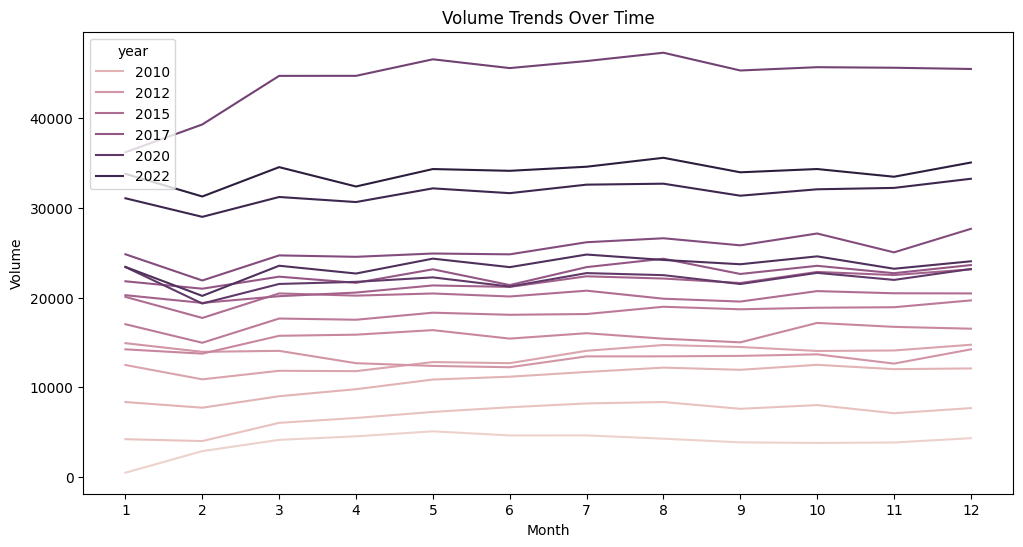

In [23]:
# Volume trends over time
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

# Group by month and year
volume_trends = df.groupby(['year', 'month']).size()
volume_trends = volume_trends.reset_index(name='volume')

# Plot volume trends
plt.figure(figsize=(12, 6))
sns.lineplot(x='month', y='volume', hue='year', data=volume_trends)
plt.title('Volume Trends Over Time')
plt.xlabel('Month')
plt.ylabel('Volume')
plt.xticks(range(1, 13))
plt.show();

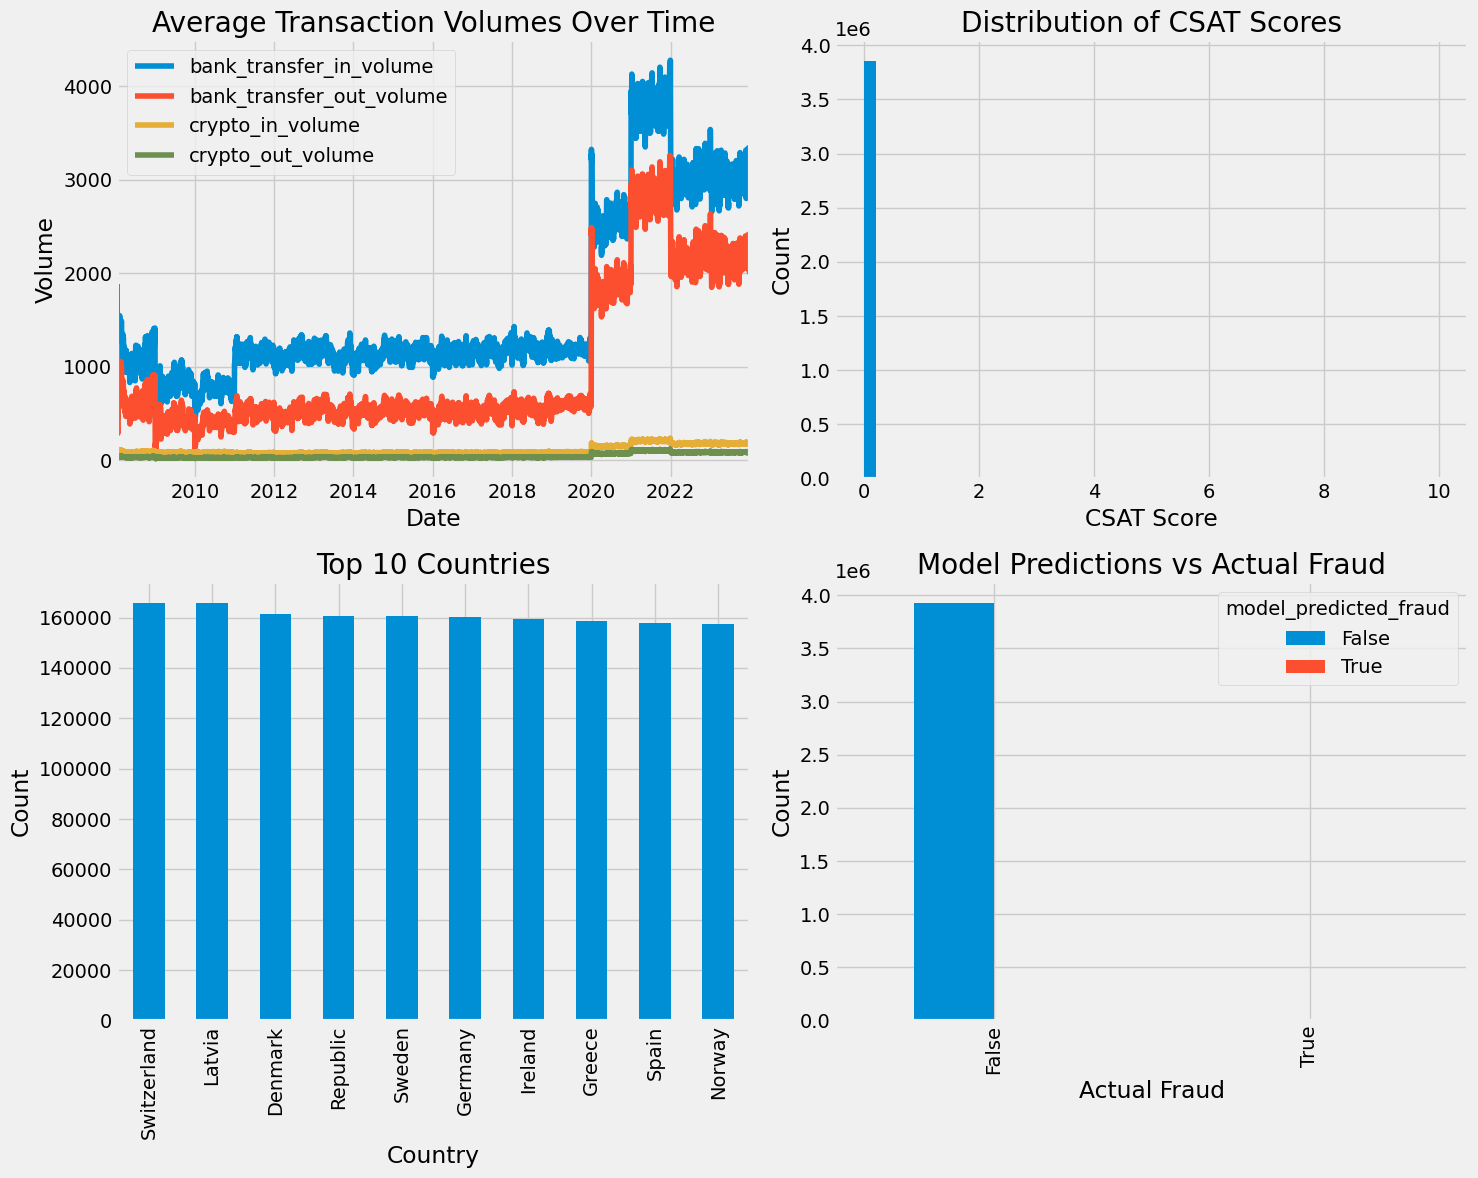

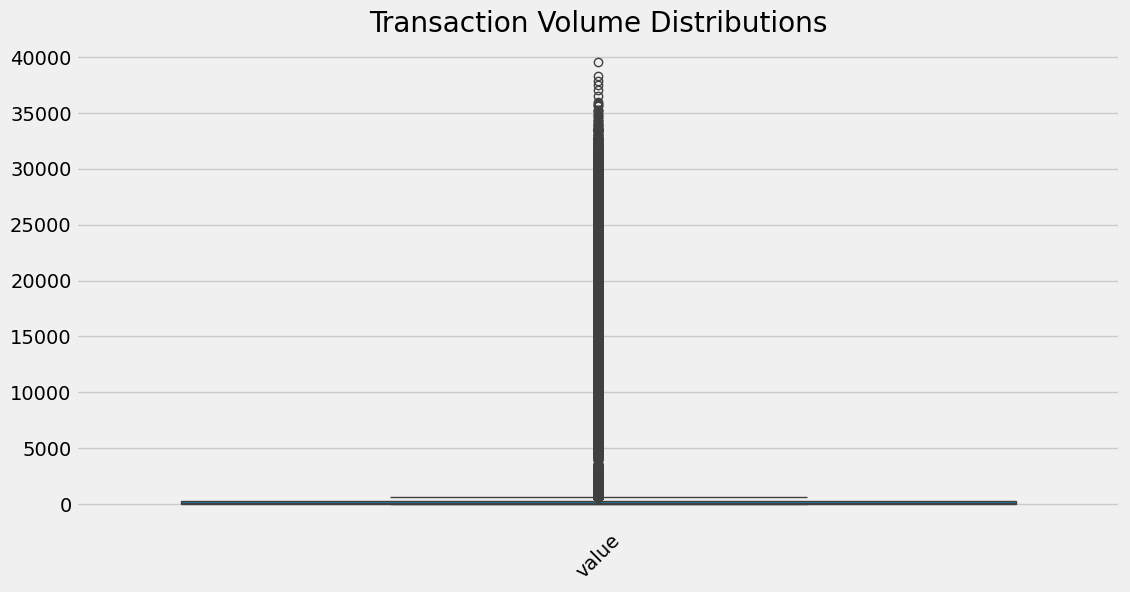

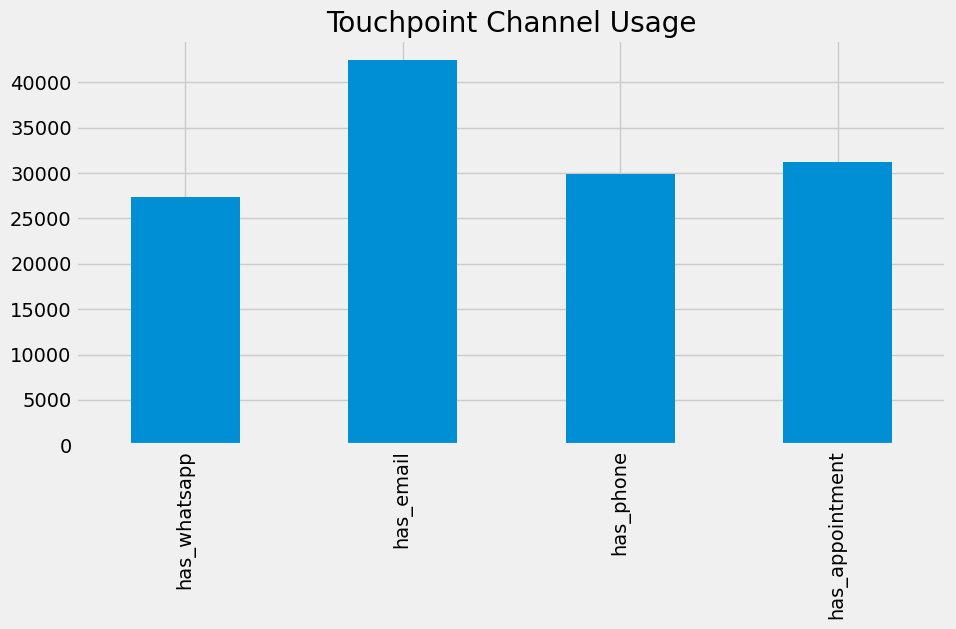

In [24]:
# Set up visualization style
plt.style.use('fivethirtyeight')
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Transaction Volume Analysis
df.groupby('date')[['bank_transfer_in_volume', 'bank_transfer_out_volume', 
                    'crypto_in_volume', 'crypto_out_volume']].mean().plot(
    ax=axes[0,0], title='Average Transaction Volumes Over Time')
axes[0,0].set_xlabel('Date')
axes[0,0].set_ylabel('Volume')

# 2. CSAT and Touchpoint Analysis
df['avg_csat_score'].hist(ax=axes[0,1], bins=50)
axes[0,1].set_title('Distribution of CSAT Scores')
axes[0,1].set_xlabel('CSAT Score')
axes[0,1].set_ylabel('Count')

# 3. Geographic Distribution
df['address_country'].value_counts().head(10).plot(
    kind='bar', ax=axes[1,0], title='Top 10 Countries')
axes[1,0].set_xlabel('Country')
axes[1,0].set_ylabel('Count')

# 4. Fraud Analysis
fraud_data = pd.crosstab(df['churn_due_to_fraud'], df['model_predicted_fraud'])
fraud_data.plot(kind='bar', ax=axes[1,1], 
                title='Model Predictions vs Actual Fraud')
axes[1,1].set_xlabel('Actual Fraud')
axes[1,1].set_ylabel('Count')

plt.tight_layout()
plt.show()

# Additional Analyses
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.melt(value_vars=['bank_transfer_in_volume', 
                                    'bank_transfer_out_volume',
                                    'crypto_in_volume', 
                                    'crypto_out_volume']))
plt.xticks(rotation=45)
plt.title('Transaction Volume Distributions')
plt.show()

# Touchpoint Analysis
plt.figure(figsize=(10, 5))
touchpoint_cols = ['has_whatsapp', 'has_email', 'has_phone', 'has_appointment']
df[touchpoint_cols].sum().plot(kind='bar')
plt.title('Touchpoint Channel Usage')
plt.show()

## Modelling

In [25]:
# Save df
df.to_csv('processed_train_data.csv', index=False)